In [1]:
import pandas as pd

In [5]:
import pandas as pd

# Read the text file into a pandas DataFrame
with open('TG_STAID004563.txt', 'r') as f:
    lines = f.readlines()

# Extract the lines containing the data, starting from line 21
data_lines = lines[20:]

# Create a StringIO object from the data_lines to read the data with pandas
from io import StringIO
data_string = StringIO(''.join(data_lines))

# Read the data into a pandas DataFrame with the correct column names
df = pd.read_csv(data_string, sep=',', names=['SOUID', 'DATE', 'TG', 'Q_TG'], header=None)

# Display the DataFrame
print(df.head())



    SOUID      DATE  TG  Q_TG
0  127488  18760101  22     0
1  127488  18760102  25     0
2  127488  18760103   3     0
3  127488  18760104 -58     0
4  127488  18760105 -98     0


In [6]:
# Create a new column with the TG values divided by 10
df['TG_Celsius'] = df['TG'] / 10

# Display the DataFrame
print(df.head())


    SOUID      DATE  TG  Q_TG  TG_Celsius
0  127488  18760101  22     0         2.2
1  127488  18760102  25     0         2.5
2  127488  18760103   3     0         0.3
3  127488  18760104 -58     0        -5.8
4  127488  18760105 -98     0        -9.8


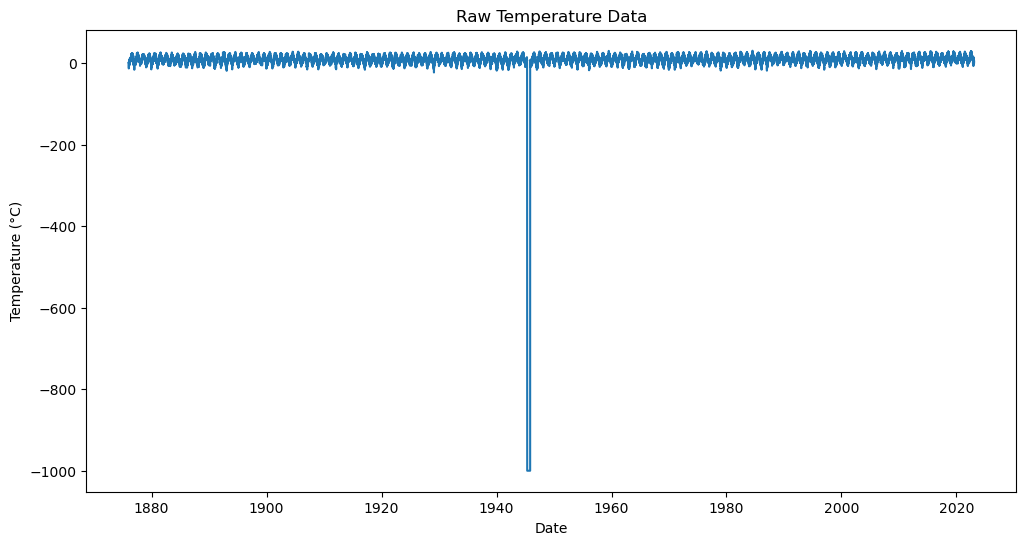

In [7]:
import matplotlib.pyplot as plt

# Convert the DATE column to a datetime object
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')

# Create a line plot of the raw temperature data
plt.figure(figsize=(12, 6))
plt.plot(df['DATE'], df['TG_Celsius'])
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Raw Temperature Data')
plt.show()


In [17]:
# Convert the DATE column to a string data type
df['DATE'] = df['DATE'].astype(str)


In [18]:
# Slice off year, month, and day into separate columns
df['year'] = df['DATE'].str[0:4]
df['month'] = df['DATE'].str[4:6]
df['day'] = df['DATE'].str[6:8]


In [19]:

# Create a new date column via string concatenation
df['formatted_date'] = df['year'] + '-' + df['month'] + '-' + df['day']


In [21]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')

ValueError: time data '1876-01-01' does not match format '%Y%m%d' (match)

In [24]:
# Calculate the overall median temperature, ignoring the missing values (-999.9)
median_temp = df.loc[df['TG'] != -999.9, 'TG'].median()

# Create a new column, replacing -999.9 with the overall median temperature
df['TG_median_filled'] = df['TG'].replace(-999.9, median_temp)


In [25]:
df.loc[:'2021-12-31']

,SOUID,DATE,TG,Q_TG,TG_Celsius,year,month,day,formatted_date,TG_median_filled
0,127488,1876-01-01,22,0,2.2,1876,-0,1-,1876--0-1-,22
1,127488,1876-01-02,25,0,2.5,1876,-0,1-,1876--0-1-,25
2,127488,1876-01-03,3,0,0.3,1876,-0,1-,1876--0-1-,3
3,127488,1876-01-04,-58,0,-5.8,1876,-0,1-,1876--0-1-,-58
4,127488,1876-01-05,-98,0,-9.8,1876,-0,1-,1876--0-1-,-98
...,...,...,...,...,...,...,...,...,...,...
20205,127488,1931-04-28,81,0,8.1,1931,-0,4-,1931--0-4-,81
20206,127488,1931-04-29,63,0,6.3,1931,-0,4-,1931--0-4-,63
20207,127488,1931-04-30,68,0,6.8,1931,-0,4-,1931--0-4-,68
20208,127488,1931-05-01,87,0,8.7,1931,-0,5-,1931--0-5-,87


In [1]:

df.groupby('year')[col2].median()

NameError: name 'df' is not defined